# Linear Regression

In [84]:
import pandas as pd

df_sim = pd.DataFrame(
    {
        'Kilometres': [1, 2, 3, 4, 5],
        'Meter': [7.5, 10, 12.5, 15, 17.5],
        'Paid (incl. tips)': [8, 10, 14, 15, 20],
    }
)

In [85]:
df_sim.set_index('Kilometres')[['Meter']]

,Meter
Kilometres,
1,7.5
2,10.0
3,12.5
4,15.0
5,17.5


In [86]:
df_sim.set_index('Kilometres')[['Meter', 'Paid (incl. tips)']]

,Meter,Paid (incl. tips)
Kilometres,,
1,7.5,8
2,10.0,10
3,12.5,14
4,15.0,15
5,17.5,20


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


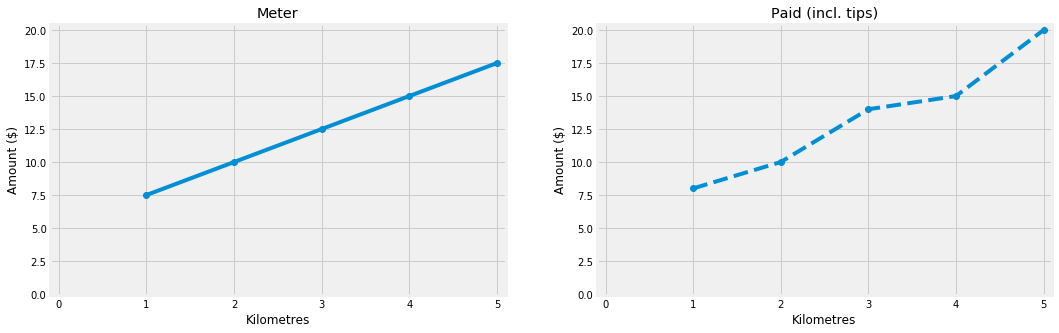

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False, sharey=False)

df_sim.set_index('Kilometres')['Meter'].plot(title='Meter', kind='line', marker='o', zorder=1, ax=axs[0], grid=True)
df_sim.set_index('Kilometres')['Paid (incl. tips)'].plot(title='Paid (incl. tips)', kind='line', marker='o', linestyle='--', ax=axs[1], grid=True)

axs[0].set_xlabel('Kilometres')
axs[1].set_xlabel('Kilometres')

axs[0].set_ylabel('Amount ($)')
axs[1].set_ylabel('Amount ($)')

axs[0].set_xlim((-0.1,5.1))
axs[0].set_ylim((-0.1,20.5))

axs[1].set_xlim((-0.1,5.1))
axs[1].set_ylim((-0.1,20.5))

# axs[0].plot([0,1], [5,7.5], linestyle='--', color='k', zorder=0, alpha=0.6)

fig.show()

In [5]:
df_taxi = df_sim

In [6]:
df_taxi

,Kilometres,Meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


## Running Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df_taxi[['Kilometres']], df_taxi['Paid (incl. tips)'])

df_taxi['Paid (Predicted)'] = reg.predict(df_taxi[['Kilometres']])

In [8]:
print(
    'Amount Paid = {:.1f} + {:.1f} * Distance'.format(
        reg.intercept_, reg.coef_[0], 
    )
) 

Amount Paid = 4.7 + 2.9 * Distance


## Plotting the Regressed Line 

In higher dimensions, the line will be a hyperplane

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


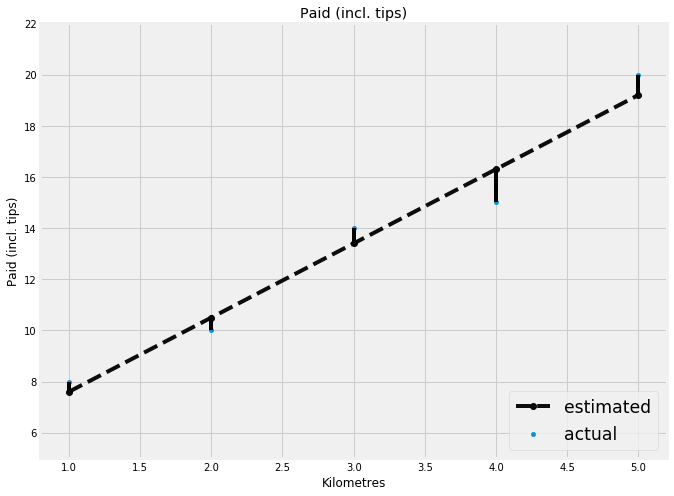

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=False, sharey=False)

df_taxi.tail(5).plot(
    label='actual', kind='scatter', x='Kilometres', y='Paid (incl. tips)',
    marker='o', alpha=0.95, ax=ax
)

df_taxi.tail(5).set_index('Kilometres')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line', 
    marker='o', linestyle='--', color='k', alpha=0.95, ax=ax
)

x_min, m_max = 0.8, 5.2
y_min, y_max = 5, 22

ax.set_xlim((x_min, m_max))
ax.set_ylim((y_min, y_max))

for x, y1, y2 in df_taxi.tail(5)[
    ['Kilometres', 'Paid (incl. tips)', 'Paid (Predicted)']
].values.tolist():
    ymin, ymax = min(y1, y2), max(y1, y2)
    ymin, ymax = (ymin-y_min)/(y_max-y_min) , (ymax-y_min)/(y_max-y_min)
    ax.axvline(x=x, ymin=ymin, ymax=ymax, color='k')

ax.legend(loc='lower right', fontsize='xx-large')

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


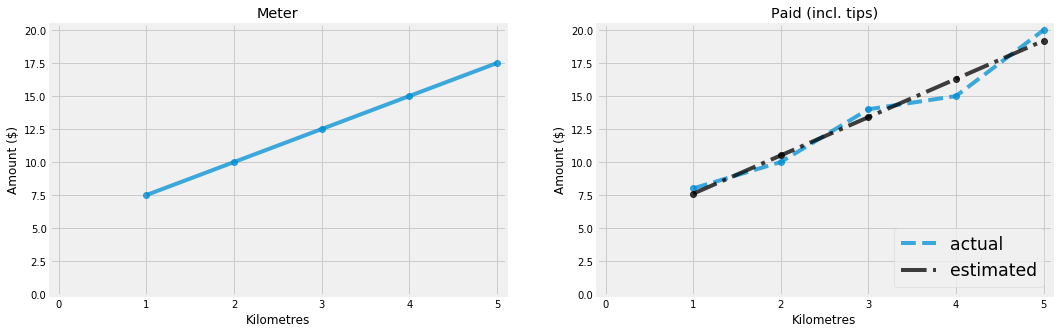

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False, sharey=False)

df_taxi.set_index('Kilometres')['Meter'].plot(
    title='Meter', kind='line', 
    marker='o', alpha=0.75, ax=axs[0]
)
df_taxi.set_index('Kilometres')['Paid (incl. tips)'].plot(
    label='actual', kind='line', 
    marker='o', linestyle='--', alpha=0.75, ax=axs[1]
)

df_taxi.set_index('Kilometres')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line', 
    marker='o', linestyle='-.', color='k', alpha=0.75, ax=axs[1]
)

axs[0].set_xlabel('Kilometres')
axs[1].set_xlabel('Kilometres')

axs[0].set_ylabel('Amount ($)')
axs[1].set_ylabel('Amount ($)')

axs[0].set_xlim((-0.1,5.1))
axs[0].set_ylim((-0.1,20.5))

axs[1].set_xlim((-0.1,5.1))
axs[1].set_ylim((-0.1,20.5))

axs[1].legend(
    markerscale=0.01, loc='lower right', fontsize='xx-large'
)

fig.show()

In [89]:
print(
    'Amount Paid =  {:.1f} + {:.1f} * Distance'.format(
        reg.intercept_, reg.coef_[0], 
    )
) 

Amount Paid =  0.0 + 0.0 * Distance


## Anscombe Data (not in the book)

This is an interesting dataset, all 3 y's have the same means and standard deviation, yet they require different regression models to fit each of them.

In [92]:
import pandas as pd

In [93]:
df_anscombe = pd.DataFrame(
    [[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
     [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
     [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
     [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]]
).T

df_anscombe.columns = ['x', 'y1', 'y2', 'y3']

In [94]:
df_anscombe.set_index('x')

,y1,y2,y3
x,,,
10.0,8.04,9.14,7.46
8.0,6.95,8.14,6.77
13.0,7.58,8.74,12.74
9.0,8.81,8.77,7.11
11.0,8.33,9.26,7.81
14.0,9.96,8.10,8.84
6.0,7.24,6.13,6.08
4.0,4.26,3.10,5.39
12.0,10.84,9.13,8.15


In [95]:
df_anscombe[['y1', 'y2', 'y3']].apply([np.mean, np.std])

,y1,y2,y3
mean,7.500909,7.500909,7.500000
std,2.031568,2.031657,2.030424


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


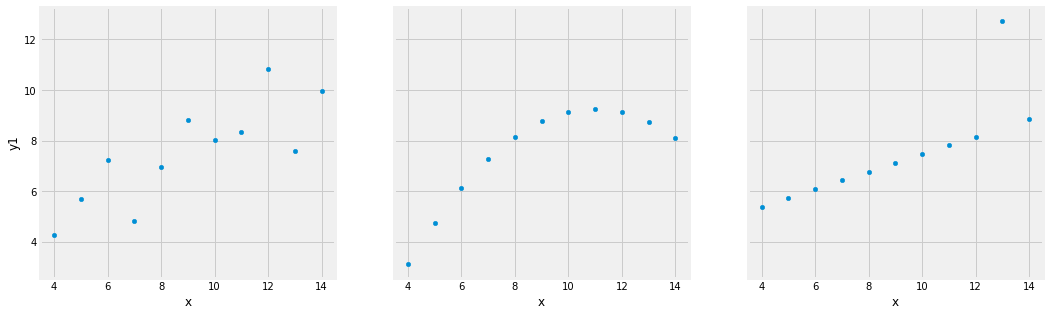

In [96]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

for i in range(3):

    df_anscombe.plot(
        kind='scatter', x='x', y=f'y{i+1}', ax=axs[i]
    )
    
fig.show()

R2: 0.67, MSE: 1.25, MAE: 0.84,  MdAE: 0.74   @ target=y1
R2: 0.67, MSE: 1.25, MAE: 0.97,  MdAE: 0.76   @ target=y2
R2: 0.67, MSE: 1.25, MAE: 0.72,  MdAE: 0.39   @ target=y3


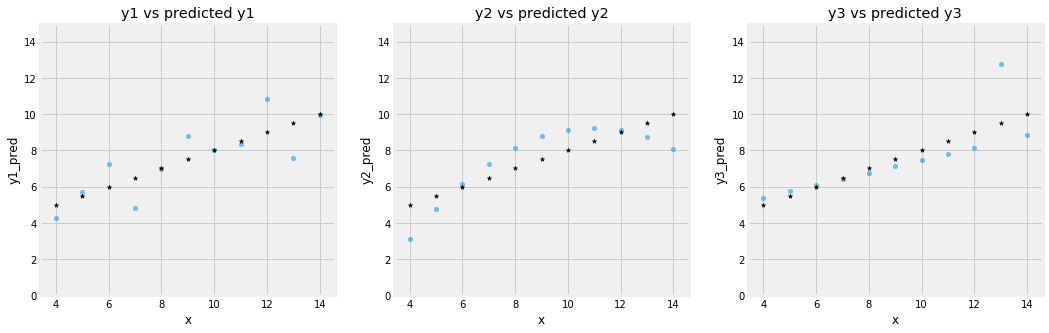

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=False)

for i, target in enumerate(['y1', 'y2', 'y3']):

    reg = LinearRegression()
    reg.fit(df_anscombe[['x']], df_anscombe[target])
    df_anscombe[f'{target}_pred'] = reg.predict(df_anscombe[['x']])
    
    df_anscombe.plot(
        title=f'{target} vs predicted {target}', kind='scatter', x='x', y=target, ax=axs[i], marker='o', ylim=(0,15), alpha=0.5
    )
    
    # df_anscombe.set_index('x')[f'{target}_pred'].plot(kind='line', ax=axs[i], color='r')
    df_anscombe.plot(
        kind='scatter', x='x', y=f'{target}_pred', ax=axs[i], marker='*', color='k'
    )

    
    print(
        'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f},  MdAE: {:.2f}   @ target={}'.format(
            r2_score(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_squared_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            median_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            target
        )
    )

MSE: 1.31, MAE: 1.01 @ target=y1
MSE: 0.72, MAE: 0.68 @ target=y2
MSE: 1.34, MAE: 0.98 @ target=y3


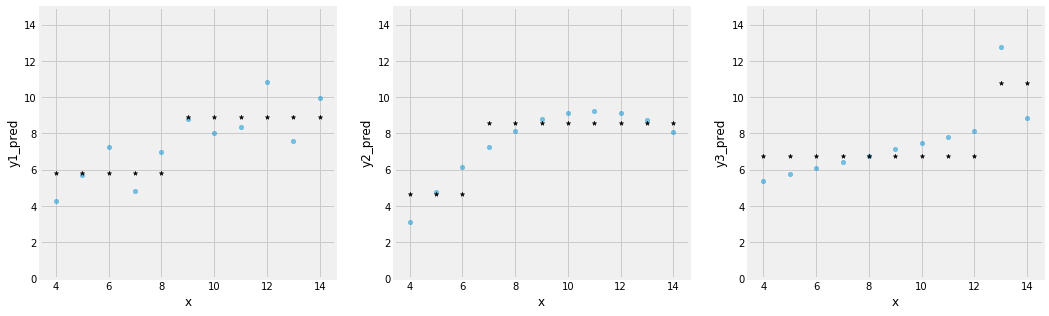

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error, mean_absolute_error

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=False)

for i, target in enumerate(['y1', 'y2', 'y3']):

    reg = DecisionTreeRegressor(max_depth=1)
    reg.fit(df_anscombe[['x']], df_anscombe[target])
    df_anscombe[f'{target}_pred'] = reg.predict(df_anscombe[['x']])
    
    df_anscombe.plot(
        kind='scatter', x='x', y=target, ax=axs[i], marker='o', ylim=(0,15), alpha=0.5
    )
    
    # df_anscombe.set_index('x')[f'{target}_pred'].plot(kind='line', ax=axs[i], color='r')
    df_anscombe.plot(
        kind='scatter', x='x', y=f'{target}_pred', ax=axs[i], marker='*', color='k'
    )
    
    print(
        'MSE: {:.2f}, MAE: {:.2f} @ target={}'.format(
            mean_squared_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            mean_absolute_error(df_anscombe[target], df_anscombe[f'{target}_pred']),
            target
        )
    )

In [99]:
 print(export_text(reg, feature_names=['x'], spacing=3, decimals=1))

|--- x <= 12.5
|   |--- value: [6.8]
|--- x >  12.5
|   |--- value: [10.8]



# Boston Dataset

In [34]:
from sklearn.datasets import load_boston

boston = load_boston()

df_dataset = pd.DataFrame(
    boston.data,
    columns=boston.feature_names,
)

df_dataset['target'] = boston.target

The next code allows me to switch between 3 different datasets 

In [35]:
from sklearn.datasets import load_boston, fetch_california_housing, load_diabetes

dataset_selection = ['boston', 'california', 'diabetes'][0]

if dataset_selection == 'diabetes':
    _dataset = load_diabetes()
elif dataset_selection == 'boston':
    _dataset = load_boston()
else:
    _dataset = fetch_california_housing()


df_dataset = pd.DataFrame(
    _dataset.data,
    columns=_dataset.feature_names,
)

df_dataset['target'] = _dataset.target

In [36]:
print(_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
df_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
df_dataset[boston.feature_names].mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

## Data Exploration

In [100]:
# Checking if we have null values 

df_dataset.isnull().sum().sum()

0

In [101]:
# Checking the target's distribution

df_dataset['target'].describe(percentiles=[.9, .95, .99])

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
50%       21.200000
90%       34.800000
95%       43.400000
99%       50.000000
max       50.000000
Name: target, dtype: float64

In [102]:
# Understanding the loaded features 

df_dataset[boston.feature_names].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


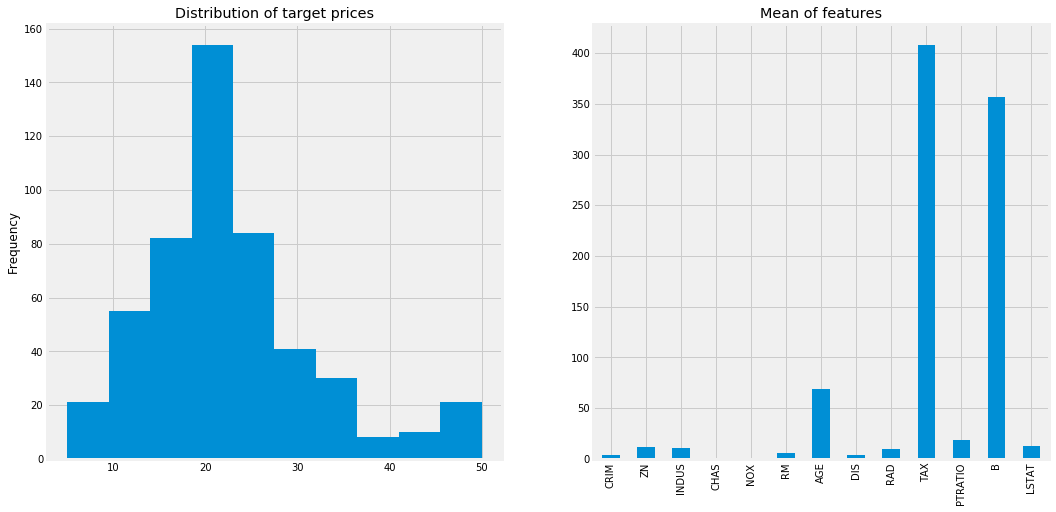

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

df_dataset['target'].plot(title='Distribution of target prices', kind='hist', ax=axs[0])

df_dataset[boston.feature_names].mean().plot(title='Mean of features', kind='bar', ax=axs[1])


fig.show()

## Correlation Plot

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


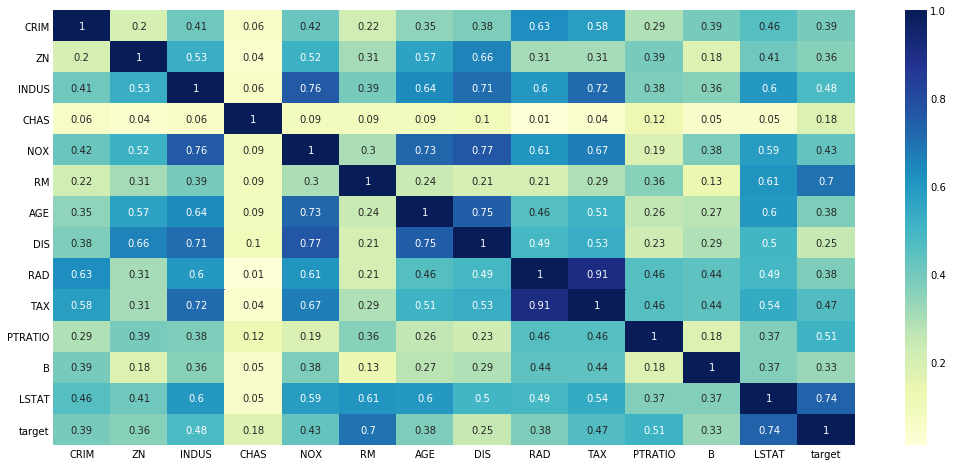

In [43]:
import seaborn as sns 

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.heatmap(data=df_dataset.corr().abs().round(2), annot=True, cmap="YlGnBu", center=0.5, ax=ax)

fig.show()

## Splitting the Dataset

In [110]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_dataset, test_size=0.4)

x_train = df_train[_dataset.feature_names]
x_test  = df_test[_dataset.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

In [111]:
df_dataset['target'].mean(), df_train['target'].mean(), df_test['target'].mean()

(22.532806324110677, 22.21023102310231, 23.014285714285716)

In [112]:
df_dataset['target'].median(), df_train['target'].median(), df_test['target'].median()

(21.2, 21.1, 21.6)

## Baseline Regressor

In [113]:
from sklearn.dummy import DummyRegressor

baselin = DummyRegressor(strategy='mean')
baselin.fit(x_train, y_train)

y_test_baselin = baselin.predict(x_test)

In [114]:
y_test_baselin[:5]

array([22.21023102, 22.21023102, 22.21023102, 22.21023102, 22.21023102])

## Linear Regressor

In [115]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)

## Comparing our Linear Regression to the baseline model

In [116]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_test_baselin)
    )
)


R2 Regressor = 0.71 vs Baseline = -0.01
MAE Regressor = 3.88 vs Baseline = 6.89
MSE Regressor = 28.83 vs Baseline = 99.15


In [117]:
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('Coeff', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
CHAS,3.523780,3.523780
RM,2.138745,2.138745
RAD,0.269508,0.269508
ZN,0.055773,0.055773
B,0.012082,0.012082
AGE,0.003247,0.003247
TAX,-0.010670,0.010670
CRIM,-0.013802,0.013802
INDUS,-0.018162,0.018162


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


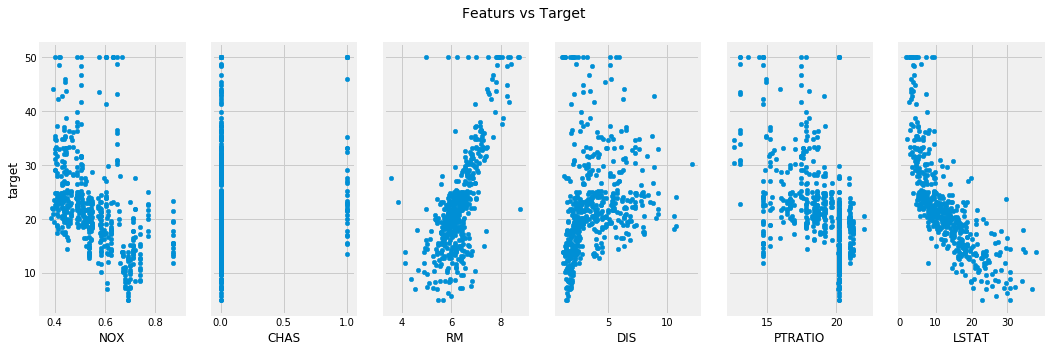

In [118]:
important_featurs = df_feature_importance.sort_values('ABS(Coeff)', ascending=False).index.tolist()[:6]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(16, 5), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_dataset.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

scaler.fit(x_train) 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

reg.fit(x_train_scaled, y_train)

y_test_pred = reg.predict(x_test_scaled)

In [120]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_test_baselin)
    )
)


R2 Regressor = 0.71 vs Baseline = -0.01
MAE Regressor = 3.88 vs Baseline = 6.89
MSE Regressor = 28.83 vs Baseline = 99.15


In [121]:
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('Coeff', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,11.162109,11.162109
RAD,6.198673,6.198673
ZN,5.577348,5.577348
B,4.791642,4.791642
CHAS,3.523780,3.523780
AGE,0.315264,0.315264
INDUS,-0.495453,0.495453
CRIM,-1.014823,1.014823
TAX,-5.580194,5.580194


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


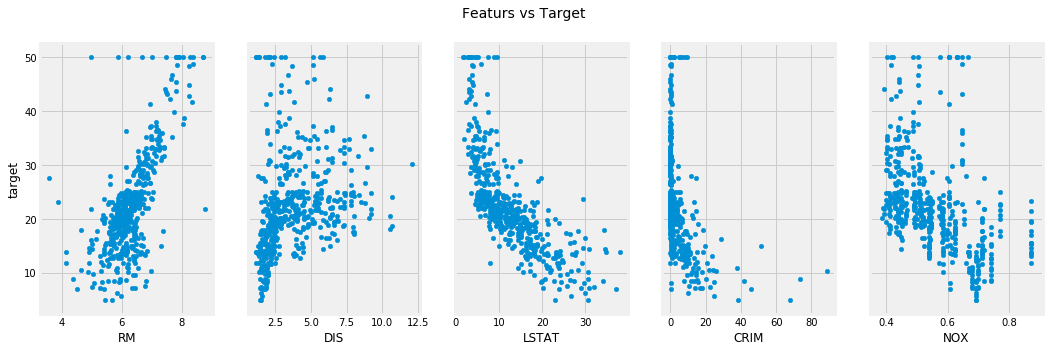

In [56]:
important_featurs = df_feature_importance.sort_values('ABS(Coeff)', ascending=False).index.tolist()[:5]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(16, 5), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_dataset.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

## Adding Polynomial Features

In [122]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [123]:
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(x_train.columns, 0)]

def translate_feature_names(s):
    for key, val in feature_translator:
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in poly.get_feature_names()
]

In [124]:
poly_features[:5]

['1', 'CRIM', 'ZN', 'INDUS', 'CHAS']

In [125]:
x_train_poly = pd.DataFrame(x_train_poly, columns=poly_features)
x_test_poly = pd.DataFrame(x_test_poly, columns=poly_features)

In [126]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

In [127]:
x_train_poly.shape

(303, 560)

In [128]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_test_baselin)
    )
)


R2 Regressor = -1779.801 vs Baseline = -0.0
MAE Regressor = 83.901 vs Baseline = 6.9
MSE Regressor = 175416.176 vs Baseline = 99.2


In [129]:
x_train_poly.corr()

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,ZN0^3,ZN0^2 ZN1,ZN0^2 ZN2,ZN0 ZN1^2,ZN0 ZN1 ZN2,ZN0 ZN2^2,ZN1^3,ZN1^2 ZN2,ZN1 ZN2^2,ZN2^3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRIM,NaN,1.000000,-0.223404,0.415626,-0.067407,0.438434,-0.264047,0.398427,-0.409130,0.658170,...,0.323198,-0.289927,0.515537,-0.445567,0.101581,0.514396,-0.529322,-0.016093,0.214623,0.477870
ZN,NaN,-0.223404,1.000000,-0.546942,-0.076711,-0.526713,0.328753,-0.569498,0.670739,-0.332850,...,-0.350266,-0.091572,-0.429276,0.061411,-0.349521,-0.336015,0.209895,-0.293432,-0.304253,-0.253397
INDUS,NaN,0.415626,-0.546942,1.000000,0.045772,0.757920,-0.407121,0.666270,-0.729739,0.572268,...,0.407733,-0.012417,0.624719,-0.224279,0.446052,0.547373,-0.399147,0.342261,0.462458,0.448283
CHAS,NaN,-0.067407,-0.076711,0.045772,1.000000,0.071084,0.126426,0.078795,-0.106944,0.004661,...,-0.108271,-0.010076,-0.126720,0.017174,-0.066676,-0.098913,0.031086,-0.041579,-0.056364,-0.080771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZN0 ZN2^2,NaN,0.514396,-0.336015,0.547373,-0.098913,0.538193,-0.530627,0.558034,-0.485305,0.467276,...,0.411844,-0.052867,0.936672,-0.244088,0.659143,1.000000,-0.383285,0.533159,0.807586,0.966147
ZN1^3,NaN,-0.529322,0.209895,-0.399147,0.031086,-0.440796,0.162205,-0.342146,0.350005,-0.463462,...,-0.187553,0.711408,-0.390007,0.928230,0.251364,-0.383285,1.000000,0.419015,0.068801,-0.339574
ZN1^2 ZN2,NaN,-0.016093,-0.293432,0.342261,-0.041579,0.286858,-0.507258,0.409186,-0.284093,0.081219,...,0.258771,0.577637,0.564306,0.535625,0.962848,0.533159,0.419015,1.000000,0.887052,0.468602
ZN1 ZN2^2,NaN,0.214623,-0.304253,0.462458,-0.056364,0.439361,-0.561234,0.497390,-0.405439,0.247726,...,0.284099,0.307160,0.754920,0.196187,0.920995,0.807586,0.068801,0.887052,1.000000,0.780267


### Showing the Polynomial Features and their coefficients

In [131]:
df_features = pd.DataFrame(
    {
        'Features': x_train_poly.columns,
        'Coeff': reg.coef_
    }
).set_index('Features').sort_values('Coeff')

df_features[df_features['Coeff'].abs() > 0]


,Coeff
Features,
CRIM^2 NOX,-2.449692
RM DIS ZN2,-1.258648
RM ZN0 ZN2,-0.961161
RAD ZN0^2,-0.947691
CRIM NOX ZN2,-0.910405
...,...
NOX RAD ZN1,0.596884
RM RAD ZN2,0.732233
ZN2^2,0.983744


In [132]:
from sklearn.linear_model import Ridge, Lasso

# reg = Ridge(fit_intercept=False, solver='svd', alpha=1)
reg = Lasso(fit_intercept=False)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 790.5744081910345, tolerance: 17.210957
  positive)


In [133]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_test_baselin)
    )
)


R2 Regressor = 0.725 vs Baseline = -0.0
MAE Regressor = 2.879 vs Baseline = 6.9
MSE Regressor = 27.113 vs Baseline = 99.2


In [134]:
df_features = pd.DataFrame(
    {
        'Features': x_train_poly.columns,
        'Coeff': reg.coef_
    }
).set_index('Features').sort_values('Coeff')

df_features[df_features['Coeff'].abs() > 0]


,Coeff
Features,
CRIM^2,-0.018273
CHAS RM TAX,-0.012368
RM^2 ZN2,-0.011554
CHAS AGE ZN2,-0.011163
DIS RAD^2,-0.010329
...,...
TAX,0.017263
DIS RAD ZN2,0.020347
ZN1,0.026464


## Regularized Linear Model (Lasso + Cross Validation)

In [135]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-6, 6, 50)

reg = LassoCV(alphas=alphas, fit_intercept=False, cv=5, n_jobs=5)

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("always", ConvergenceWarning) 

with warnings.catch_warnings(record=True) as w:
    reg.fit(x_train_poly, y_train)

y_train_pred = reg.predict(x_train_poly)
y_test_pred = reg.predict(x_test_poly)

In [136]:
f'{alphas.min():.6f}, {alphas.max():,.0f}'

'0.000001, 1,000,000'

In [137]:
print(f"LassoCV: Chosen alpha = {reg.alpha_}")

LassoCV: Chosen alpha = 68.66488450042998


### Regularization Plots

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


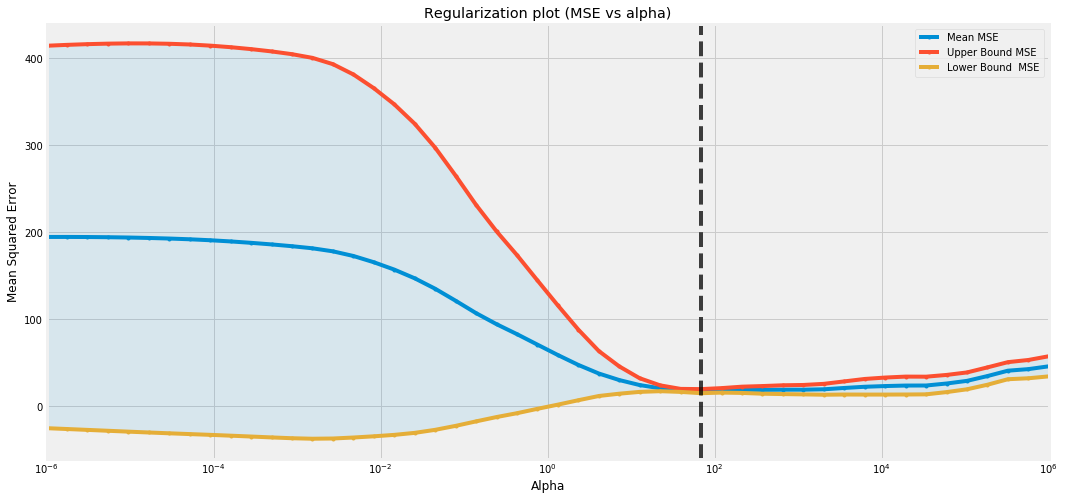

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

n_folds = reg.mse_path_.shape[1]

mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
mse_std_error = mse_std / np.sqrt(n_folds)

pd.DataFrame(
    {
        'alpha': reg.alphas_,
        'Mean MSE': mse_mean,
        'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
        'Lower Bound  MSE': mse_mean - 1.96 * mse_std_error,
    }
).set_index('alpha')[['Mean MSE', 'Upper Bound MSE', 'Lower Bound  MSE']].plot(
    title='Regularization plot (MSE vs alpha)', marker='.', logx=True, ax=ax
)

plt.fill_between(reg.alphas_, mse_mean + 1.96 * mse_std_error, mse_mean - 1.96 * mse_std_error, alpha=0.1)

ax.axvline(reg.alpha_,  linestyle='--', color='k', alpha=0.75,)

ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')

fig.show()

In [141]:
# n_folds equals to 5 here
n_folds = reg.mse_path_.shape[1]

# Calculate the mean and standard error for MSEs
mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
# Std Error = Std Deviation / SQRT(number of samples)
mse_std_error = mse_std / np.sqrt(n_folds)

Text(0, 0.5, 'Mean Squared Error')

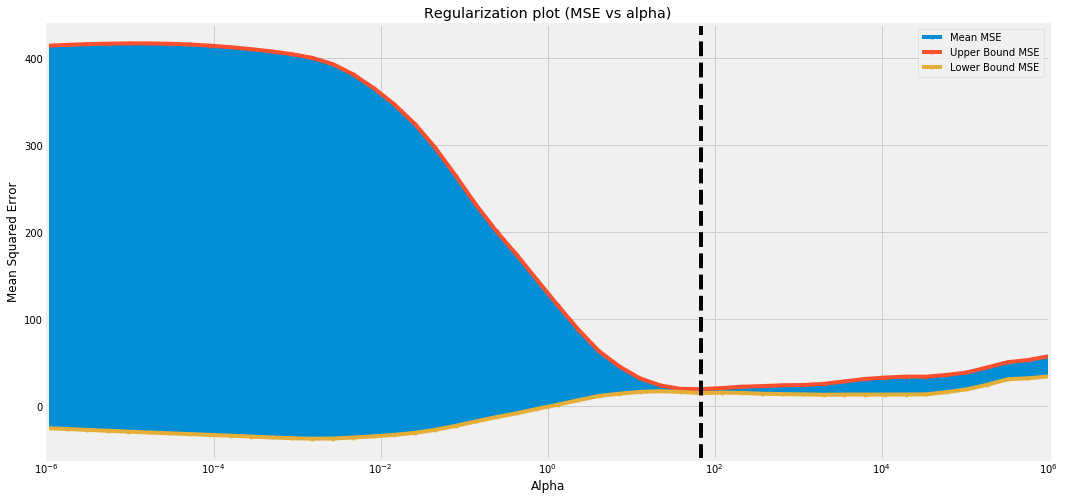

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# We multiply by 1.96 for a 95% Confidence Interval
pd.DataFrame(
    {
        'alpha': reg.alphas_,
        'Mean MSE': mse_mean,
        'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
        'Lower Bound MSE': mse_mean - 1.96 * mse_std_error,
    }
).set_index('alpha')[
    ['Mean MSE', 'Upper Bound MSE', 'Lower Bound MSE']
].plot(
    title='Regularization plot (MSE vs alpha)', 
    marker='.', logx=True, ax=ax
)

# Color the confidence interval 
plt.fill_between(
    reg.alphas_, 
    mse_mean + 1.96 * mse_std_error, 
    mse_mean - 1.96 * mse_std_error, 
)

# Print a vertical line for the chosen alpha
ax.axvline(reg.alpha_, linestyle='--', color='k')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')

### MSE, MAE and R2

In [143]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred), 
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred), 
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred), 
        mean_squared_error(y_test, y_test_baselin)
    )
)


R2 Regressor = -0.134 vs Baseline = -0.0
MAE Regressor = 3.943 vs Baseline = 6.9
MSE Regressor = 111.683 vs Baseline = 99.2


### Features + Coefficients 

In [144]:
df_features = pd.DataFrame(
    {
        'Features': x_train_poly.columns,
        'Coeff': reg.coef_
    }
).set_index('Features').sort_values('Coeff')

df_features[df_features['Coeff'].abs() > 0]


,Coeff
Features,
RAD TAX,-0.001212
INDUS NOX TAX,-0.001069
INDUS^2 RAD,-0.000876
CRIM DIS TAX,-0.000486
CRIM RM ZN1,-0.000463
...,...
ZN TAX,0.001189
RM^2 ZN1,0.001321
INDUS TAX,0.002115


# Regression Ranges

In [145]:
df_noisy = pd.DataFrame(
    {
        'x': np.random.random_integers(0, 30, size=150),
        'noise': np.random.normal(loc=0.0, scale=5.0, size=150)
    }
)

df_noisy['y'] = df_noisy['x'] + df_noisy['noise']


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 30 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


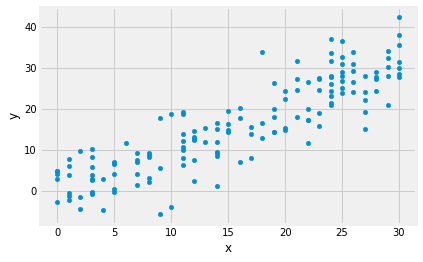

In [146]:
df_noisy.plot(
    kind='scatter', x='x', y='y'
)

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
    
lr = LinearRegression()
br = BayesianRidge()

lr.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_lr_pred'] = lr.predict(df_noisy[['x']])


br.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_br_pred'], df_noisy['y_br_std'] = br.predict(df_noisy[['x']], return_std=True)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


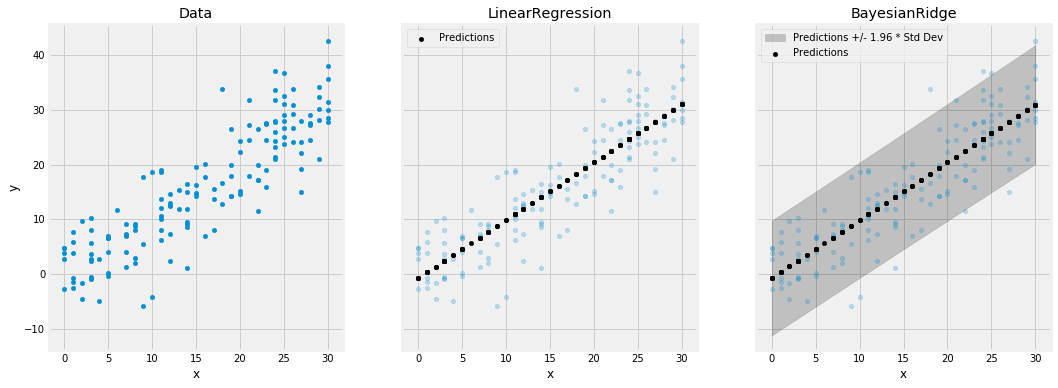

In [148]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)


df_noisy.sort_values('x').plot(
    title='Data', kind='scatter', x='x', y='y', ax=axs[0]
)
    
df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[1], marker='o', alpha=0.25
)

axs[2].fill_between(
    df_noisy.sort_values('x')['x'], 
    df_noisy.sort_values('x')['y_br_pred'] - 1.96 * df_noisy.sort_values('x')['y_br_std'], 
    df_noisy.sort_values('x')['y_br_pred'] + 1.96 * df_noisy.sort_values('x')['y_br_std'],
    color="k", alpha=0.2, label="Predictions +/- 1.96 * Std Dev"
)

df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[2], marker='o', alpha=0.25
)

df_noisy.sort_values('x').plot(
    title='LinearRegression', kind='scatter', x='x', y='y_lr_pred', 
    ax=axs[1], marker='o', color='k', label='Predictions'
)

df_noisy.sort_values('x').plot(
    title='BayesianRidge', kind='scatter', x='x', y='y_br_pred', 
    ax=axs[2], marker='o', color='k', label='Predictions'
)


axs[1].legend()
axs[2].legend()

    
fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


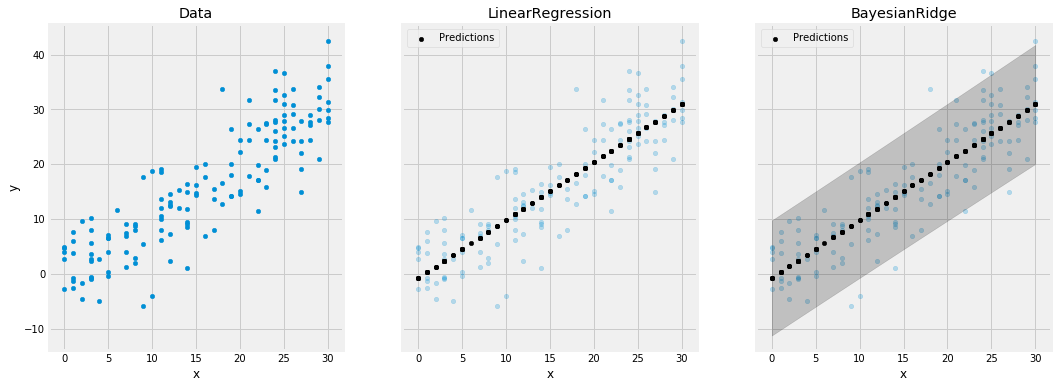

In [149]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)

# We plot the data 3 times
df_noisy.sort_values('x').plot(
    title='Data', kind='scatter', x='x', y='y', ax=axs[0]
)
df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[1], marker='o', alpha=0.25
)
df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[2], marker='o', alpha=0.25
)

# Here we plot the Linear Regression predictions
df_noisy.sort_values('x').plot(
    title='LinearRegression', kind='scatter', x='x', y='y_lr_pred', 
    ax=axs[1], marker='o', color='k', label='Predictions'
)

# Here we plot the Bayesian Ridge predictions
df_noisy.sort_values('x').plot(
    title='BayesianRidge', kind='scatter', x='x', y='y_br_pred', 
    ax=axs[2], marker='o', color='k', label='Predictions'
)

# Here we plot the range around the expected values
# We multiply by 1.96 for a 95% Confidence Interval
axs[2].fill_between(
    df_noisy.sort_values('x')['x'], 
    df_noisy.sort_values('x')['y_br_pred'] - 1.96 * df_noisy.sort_values('x')['y_br_std'], 
    df_noisy.sort_values('x')['y_br_pred'] + 1.96 * df_noisy.sort_values('x')['y_br_std'],
    color="k", alpha=0.2, label="Predictions +/- 1.96 * Std Dev"
)

fig.show()